In [2]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

: 

In [3]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

: 

In [6]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\HP\\Documents\\Acad stuff\\GaTech\\research\\prof_siva_spl_problems\\simulations\\repo\\utils.py'>

### Spatial with longest distance

Expected cost for c = 0 case: 2.179
[[1.41421356 2.23606798 2.23606798 2.82842712]
 [2.23606798 1.41421356 2.82842712 2.23606798]
 [2.23606798 2.82842712 1.41421356 2.23606798]
 [2.82842712 2.23606798 2.23606798 1.41421356]]


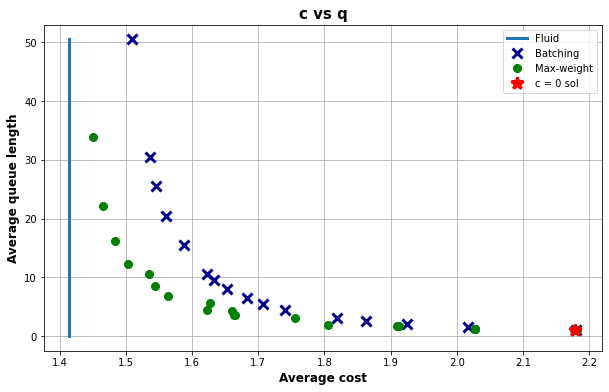

In [8]:
file_name = "longest_spatial_uniform_4.pkl"
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 2.769
[[1.41421356 2.23606798 3.16227766 2.23606798 2.82842712 3.60555128
  3.16227766 3.60555128 4.24264069]
 [2.23606798 1.41421356 2.23606798 2.82842712 2.23606798 2.82842712
  3.60555128 3.16227766 3.60555128]
 [3.16227766 2.23606798 1.41421356 3.60555128 2.82842712 2.23606798
  4.24264069 3.60555128 3.16227766]
 [2.23606798 2.82842712 3.60555128 1.41421356 2.23606798 3.16227766
  2.23606798 2.82842712 3.60555128]
 [2.82842712 2.23606798 2.82842712 2.23606798 1.41421356 2.23606798
  2.82842712 2.23606798 2.82842712]
 [3.60555128 2.82842712 2.23606798 3.16227766 2.23606798 1.41421356
  3.60555128 2.82842712 2.23606798]
 [3.16227766 3.60555128 4.24264069 2.23606798 2.82842712 3.60555128
  1.41421356 2.23606798 3.16227766]
 [3.60555128 3.16227766 3.60555128 2.82842712 2.23606798 2.82842712
  2.23606798 1.41421356 2.23606798]
 [4.24264069 3.60555128 3.16227766 3.60555128 2.82842712 2.23606798
  3.16227766 2.23606798 1.41421356]]


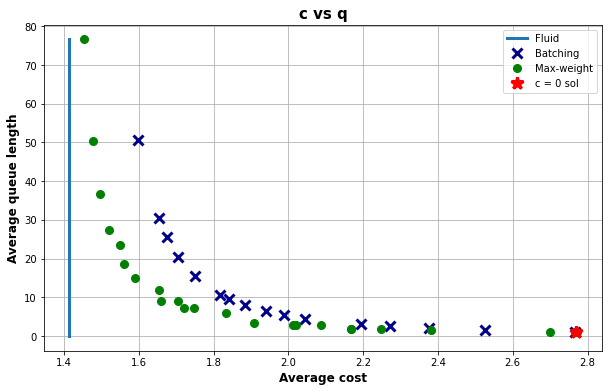

In [9]:
file_name = "longest_spatial_uniform_9.pkl"
plot_from_sim_paths(file_name)

Expected cost for c = 0 case: 276.858
[[141.42135624 223.60679775 316.22776602 223.60679775 282.84271247
  360.55512755 316.22776602 360.55512755 424.26406871]
 [223.60679775 141.42135624 223.60679775 282.84271247 223.60679775
  282.84271247 360.55512755 316.22776602 360.55512755]
 [316.22776602 223.60679775 141.42135624 360.55512755 282.84271247
  223.60679775 424.26406871 360.55512755 316.22776602]
 [223.60679775 282.84271247 360.55512755 141.42135624 223.60679775
  316.22776602 223.60679775 282.84271247 360.55512755]
 [282.84271247 223.60679775 282.84271247 223.60679775 141.42135624
  223.60679775 282.84271247 223.60679775 282.84271247]
 [360.55512755 282.84271247 223.60679775 316.22776602 223.60679775
  141.42135624 360.55512755 282.84271247 223.60679775]
 [316.22776602 360.55512755 424.26406871 223.60679775 282.84271247
  360.55512755 141.42135624 223.60679775 316.22776602]
 [360.55512755 316.22776602 360.55512755 282.84271247 223.60679775
  282.84271247 223.60679775 141.42135624 

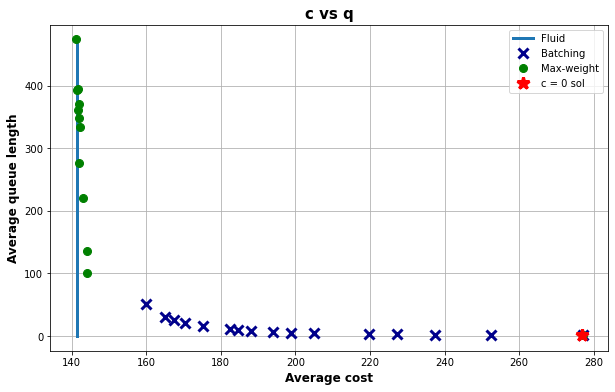

In [14]:
def plot_from_sim_paths_scale(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"][:12][:]
    C_paths_M = M_res["C_paths"][:12][:]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)
file_name = "../longest_spatial_uniform_9_scale.pkl"
plot_from_sim_paths_scale(file_name)

Expected cost for c = 0 case: 385.68
[[141.42135624 223.60679775 316.22776602 412.31056256 509.90195136
  223.60679775 282.84271247 360.55512755 447.2135955  538.51648071
  316.22776602 360.55512755 424.26406871 500.         583.09518948
  412.31056256 447.2135955  500.         565.68542495 640.31242374
  509.90195136 538.51648071 583.09518948 640.31242374 707.10678119]
 [223.60679775 141.42135624 223.60679775 316.22776602 412.31056256
  282.84271247 223.60679775 282.84271247 360.55512755 447.2135955
  360.55512755 316.22776602 360.55512755 424.26406871 500.
  447.2135955  412.31056256 447.2135955  500.         565.68542495
  538.51648071 509.90195136 538.51648071 583.09518948 640.31242374]
 [316.22776602 223.60679775 141.42135624 223.60679775 316.22776602
  360.55512755 282.84271247 223.60679775 282.84271247 360.55512755
  424.26406871 360.55512755 316.22776602 360.55512755 424.26406871
  500.         447.2135955  412.31056256 447.2135955  500.
  583.09518948 538.51648071 509.90195136

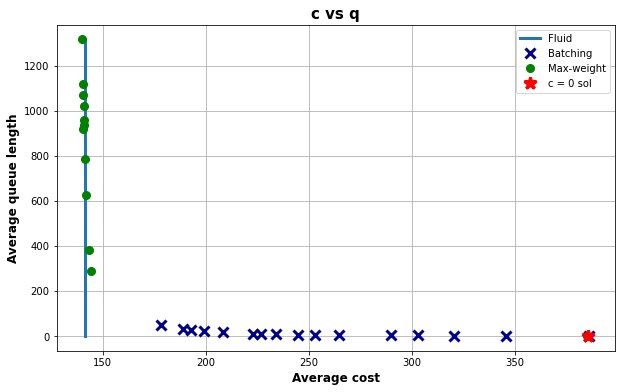

In [13]:
file_name = "../longest_spatial_uniform_25_scale.pkl"
plot_from_sim_paths_scale(file_name)

Expected cost for c = 0 case: 385.68
[[141.42135624 223.60679775 316.22776602 412.31056256 509.90195136
  223.60679775 282.84271247 360.55512755 447.2135955  538.51648071
  316.22776602 360.55512755 424.26406871 500.         583.09518948
  412.31056256 447.2135955  500.         565.68542495 640.31242374
  509.90195136 538.51648071 583.09518948 640.31242374 707.10678119]
 [223.60679775 141.42135624 223.60679775 316.22776602 412.31056256
  282.84271247 223.60679775 282.84271247 360.55512755 447.2135955
  360.55512755 316.22776602 360.55512755 424.26406871 500.
  447.2135955  412.31056256 447.2135955  500.         565.68542495
  538.51648071 509.90195136 538.51648071 583.09518948 640.31242374]
 [316.22776602 223.60679775 141.42135624 223.60679775 316.22776602
  360.55512755 282.84271247 223.60679775 282.84271247 360.55512755
  424.26406871 360.55512755 316.22776602 360.55512755 424.26406871
  500.         447.2135955  412.31056256 447.2135955  500.
  583.09518948 538.51648071 509.90195136

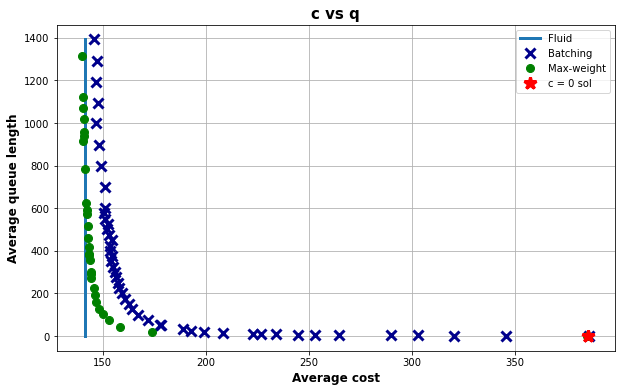

In [10]:
with open("../longest_spatial_uniform_25_scale.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"][:12][:]
C_paths_M = M_res["C_paths"][:12][:]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]

with open("../longest_spatial_uniform_25_scale_2.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M2 = M_res["Q_paths"]
C_paths_M2 = M_res["C_paths"]
Q_paths_B2 = B_res["Q_paths"]
C_paths_B2 = B_res["C_paths"]

with open("../longest_spatial_uniform_25_scale_3.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M3 = M_res["Q_paths"]
C_paths_M3 = M_res["C_paths"]
Q_paths_B3 = B_res["Q_paths"]
C_paths_B3 = B_res["C_paths"]

Q_paths_M = Q_paths_M + Q_paths_M2 + Q_paths_M3
C_paths_M = C_paths_M + C_paths_M2 + C_paths_M3
Q_paths_B = Q_paths_B + Q_paths_B2 + Q_paths_B3
C_paths_B = C_paths_B + C_paths_B2 + C_paths_B3


(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, 0)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, 0)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)
# plot_from_sim_paths_scale(file_name)

In [4]:
L = [1,2,3]
L = L + [4,5,3]
print(L)

[1, 2, 3, 4, 5, 3]


Expected cost for c = 0 case: 3.857
[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 

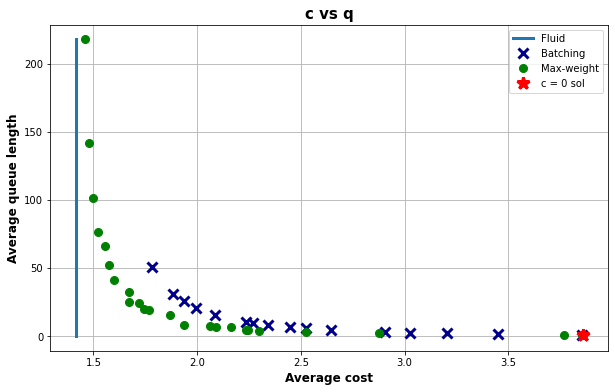

In [12]:
plot_from_sim_paths("../longest_spatial_uniform_25.pkl")

In [15]:
with open("../longest_spatial_uniform_25.pkl",'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
print(W)

[[1.41421356 2.23606798 3.16227766 4.12310563 5.09901951 2.23606798
  2.82842712 3.60555128 4.47213595 5.38516481 3.16227766 3.60555128
  4.24264069 5.         5.83095189 4.12310563 4.47213595 5.
  5.65685425 6.40312424 5.09901951 5.38516481 5.83095189 6.40312424
  7.07106781]
 [2.23606798 1.41421356 2.23606798 3.16227766 4.12310563 2.82842712
  2.23606798 2.82842712 3.60555128 4.47213595 3.60555128 3.16227766
  3.60555128 4.24264069 5.         4.47213595 4.12310563 4.47213595
  5.         5.65685425 5.38516481 5.09901951 5.38516481 5.83095189
  6.40312424]
 [3.16227766 2.23606798 1.41421356 2.23606798 3.16227766 3.60555128
  2.82842712 2.23606798 2.82842712 3.60555128 4.24264069 3.60555128
  3.16227766 3.60555128 4.24264069 5.         4.47213595 4.12310563
  4.47213595 5.         5.83095189 5.38516481 5.09901951 5.38516481
  5.83095189]
 [4.12310563 3.16227766 2.23606798 1.41421356 2.23606798 4.47213595
  3.60555128 2.82842712 2.23606798 2.82842712 5.         4.24264069
  3.60555128 3

### Blocked diagonal

Combining the data: MW and batch were run separately

In [14]:
file_name = "batching_no_diag_4.pkl"
file_2 = "../max_weight_no_diag_4.pkl"
with open(file_name,'rb') as f:
        B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
with open(file_2,'rb') as f:
        M_res, N, W, pmf_cust, pmf_serv = pickle.load(f)

In [4]:
def combine_data(b,m,outfile):
    with open(b,'rb') as f:
        B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    with open(m,'rb') as f:
        M_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    with open(outfile, 'wb') as f:
        pickle.dump([M_res,B_res, N, W, pmf_cust, pmf_serv],f)

In [5]:
combine_data("../batching_no_diag_16.pkl","../max_weight_no_diag_16.pkl","../sp_u_no-diag_16.pkl")

In [19]:
combine_data("batching_no_diag_9.pkl","../max_weight_no_diag_9.pkl","../sp_u_no-diag_9.pkl")

New function for extremes since diagonal is blocked. Not sure what's the equivalent for zero queue.

In [6]:
def fluid_solution_blocked(N, W, pmf_cust, pmf_serv, verbose = 0):
    x = cp.Variable((N,N)) # fraction of matchings from i to j
    print(W)
    constraints = []                          
    for i in range(N):
        constraints.append(x[i,i] == 0)
        for j in range(N):
            constraints.append(x[i,j] >= 0)
            constraints.append(x[i,j] <= 1)
    # inequality to avoid round off, and violating equality is anyway penalised by objective
    for i in range(N):
        constraints.append(cp.sum(x[i,:]) == pmf_cust[i] ) 
    for j in range(N):
        constraints.append(cp.sum(x[:,j]) == pmf_serv[j] )                      

    objective = cp.Minimize( cp.sum( cp.multiply( x , W ) ) )
    problem = cp.Problem(objective, constraints)
    problem.solve()
    if verbose:  
        print(problem)
    fluid_sol = {"X": x.value, "Cost": problem.value }
    return(fluid_sol)

In [25]:
fluid_solution_blocked(N, W, pmf_cust, pmf_serv, verbose = 0)

[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]


{'X': array([[5.48399145e-14, 1.25000000e-01, 1.25000000e-01, 9.67489086e-12],
        [1.25000001e-01, 5.48419974e-14, 9.67489509e-12, 1.24999999e-01],
        [1.24999999e-01, 9.67489509e-12, 5.48419974e-14, 1.25000001e-01],
        [9.67489086e-12, 1.25000000e-01, 1.25000000e-01, 5.48399145e-14]]),
 'Cost': 1.0000000000162028}

Plotting with the new fluid_sol function

In [7]:
def plot_from_sim_path_blocked(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    Ex = average_cost_M[0]
    print(average_cost_M)
    fluid_sol = fluid_solution_blocked(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

#### Plots

[1.13697285 1.13774086 1.13794383 1.13904978 1.1382362  1.13870669
 1.13899421 1.13820064 1.13615271 1.13803495 1.13846402 1.13815922
 1.07665679 1.07680419 1.10267183 1.064753   1.05708177 1.05848252
 1.05587883 1.03992575 1.02850659 1.03560036 1.02487678 1.01626842
 1.01117188]
[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]


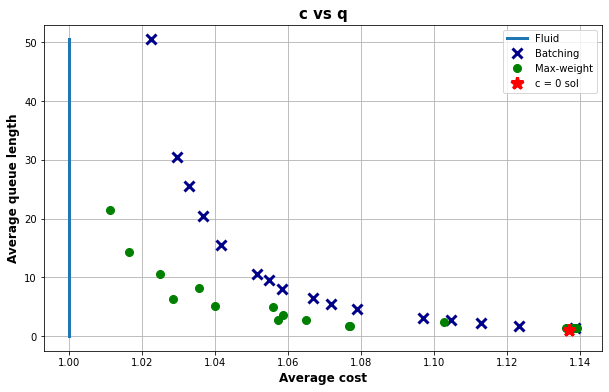

In [29]:
plot_from_sim_path_blocked("../sp_u_no-diag_4.pkl")

[1.63507594 1.63403078 1.63504946 1.62596038 1.6201344  1.56048489
 1.56044924 1.56002134 1.42928867 1.42815688 1.35216033 1.31534353
 1.21631496 1.14868217 1.14373858 1.1033925  1.08138931 1.07604552
 1.06241551 1.05170586 1.05315887 1.0469741  1.04595751 1.04538675
 1.04470597]
[[0.         1.         2.         1.         1.41421356 2.23606798
  2.         2.23606798 2.82842712]
 [1.         0.         1.         1.41421356 1.         1.41421356
  2.23606798 2.         2.23606798]
 [2.         1.         0.         2.23606798 1.41421356 1.
  2.82842712 2.23606798 2.        ]
 [1.         1.41421356 2.23606798 0.         1.         2.
  1.         1.41421356 2.23606798]
 [1.41421356 1.         1.41421356 1.         0.         1.
  1.41421356 1.         1.41421356]
 [2.23606798 1.41421356 1.         2.         1.         0.
  2.23606798 1.41421356 1.        ]
 [2.         2.23606798 2.82842712 1.         1.41421356 2.23606798
  0.         1.         2.        ]
 [2.23606798 2.        

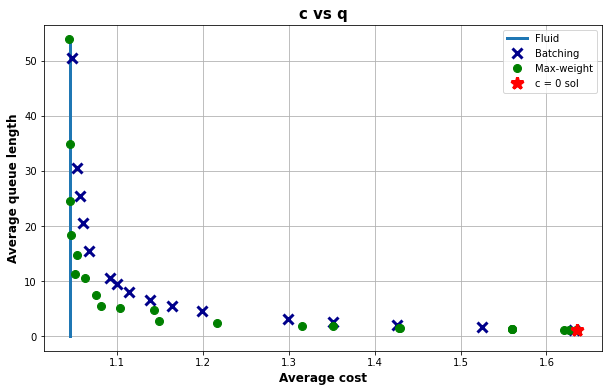

In [30]:
plot_from_sim_path_blocked("../sp_u_no-diag_9.pkl")

[2.14223976 2.1454031  2.14238289 2.08994029 1.78345406 1.69063328
 1.66014083 1.65875428 1.53679017 1.49486383 1.36152617 1.31868756
 1.2119172  1.13025345 1.13548015 1.0806046  1.05349507 1.04979631
 1.04318959 1.02148789 1.01234558 1.02089259 1.01090016 1.00438944
 1.00269567]
[[0.         1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         0.         1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         0.         1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         0.         3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1

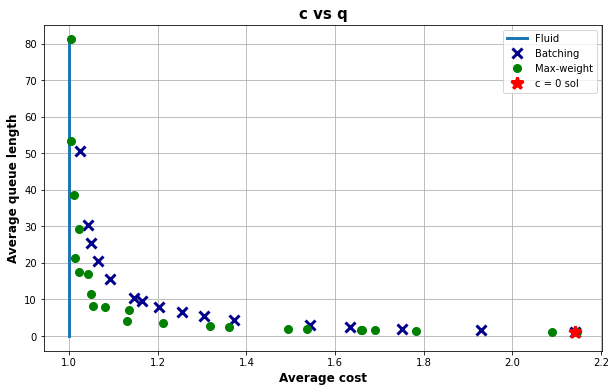

In [9]:
plot_from_sim_path_blocked("../sp_u_no-diag_16.pkl")

In [10]:
len(np.arange(0.95,0.999,0.004))

13

### N = 16

Expected cost for c = 0 case: 2.086
[[1.25       1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         1.25       1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         1.25       1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         1.25       3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 1.25       1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         1.25
  1.       

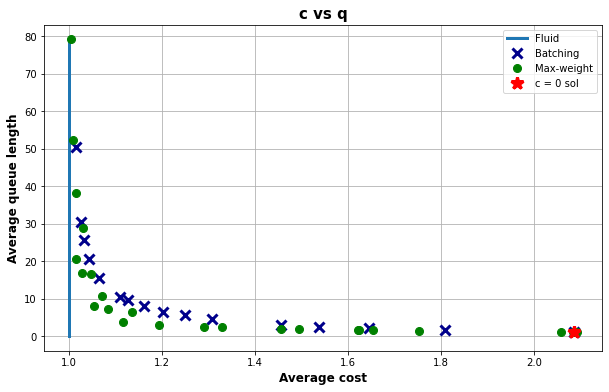

In [31]:
plot_from_sim_paths("sim_paths_spatial_uniform_16_W_1.25_new.pkl")

Expected cost for c = 0 case: 2.086
[[1.25       1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         1.25       1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         1.25       1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         1.25       3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 1.25       1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         1.25
  1.       

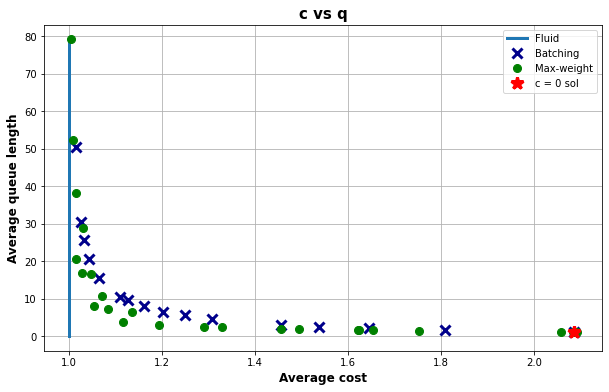

In [32]:
plot_from_sim_paths("sim_paths_spatial_uniform_16_W_1.25_new.pkl")

Compare with this: N = 9 W 1.25 and the one below N = 4 W= 1.25

Expected cost for c = 0 case: 1.592
[[1.25       1.         2.         1.         1.41421356 2.23606798
  2.         2.23606798 2.82842712]
 [1.         1.25       1.         1.41421356 1.         1.41421356
  2.23606798 2.         2.23606798]
 [2.         1.         1.25       2.23606798 1.41421356 1.
  2.82842712 2.23606798 2.        ]
 [1.         1.41421356 2.23606798 1.25       1.         2.
  1.         1.41421356 2.23606798]
 [1.41421356 1.         1.41421356 1.         1.25       1.
  1.41421356 1.         1.41421356]
 [2.23606798 1.41421356 1.         2.         1.         1.25
  2.23606798 1.41421356 1.        ]
 [2.         2.23606798 2.82842712 1.         1.41421356 2.23606798
  1.25       1.         2.        ]
 [2.23606798 2.         2.23606798 1.41421356 1.         1.41421356
  1.         1.25       1.        ]
 [2.82842712 2.23606798 2.         2.23606798 1.41421356 1.
  2.         1.         1.25      ]]


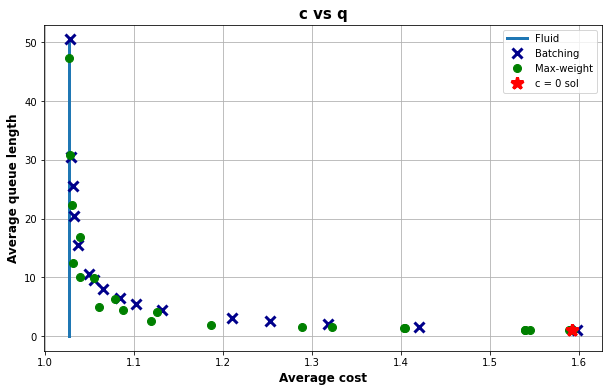

In [35]:
plot_from_sim_paths("../sim_paths_spatial_uniform_9_W_1.25.pkl")

Expected cost for c = 0 case: 1.166
[[1.25       1.         1.         1.41421356]
 [1.         1.25       1.41421356 1.        ]
 [1.         1.41421356 1.25       1.        ]
 [1.41421356 1.         1.         1.25      ]]


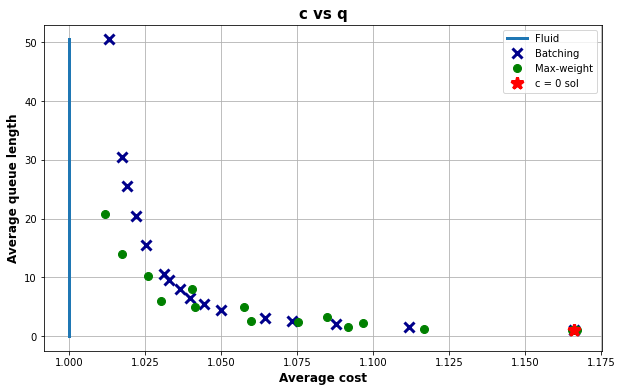

In [36]:
plot_from_sim_paths("../sim_paths_spatial_uniform_4_W_1.25.pkl")

Expected cost for c = 0 case: 2.014
[[0.1        1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         0.1        1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         0.1        1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         0.1        3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 0.1        1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         0.1
  1.        

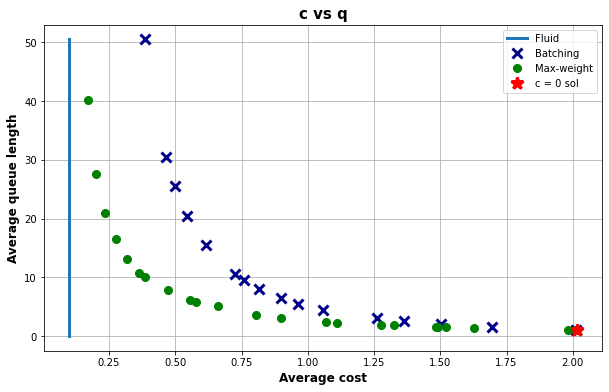

In [4]:
plot_from_sim_paths("../sim_paths_spatial_uniform_16_W_0.1_new.pkl")

Expected cost for c = 0 case: 2.133
[[2.         1.         2.         3.         1.         1.41421356
  2.23606798 3.16227766 2.         2.23606798 2.82842712 3.60555128
  3.         3.16227766 3.60555128 4.24264069]
 [1.         2.         1.         2.         1.41421356 1.
  1.41421356 2.23606798 2.23606798 2.         2.23606798 2.82842712
  3.16227766 3.         3.16227766 3.60555128]
 [2.         1.         2.         1.         2.23606798 1.41421356
  1.         1.41421356 2.82842712 2.23606798 2.         2.23606798
  3.60555128 3.16227766 3.         3.16227766]
 [3.         2.         1.         2.         3.16227766 2.23606798
  1.41421356 1.         3.60555128 2.82842712 2.23606798 2.
  4.24264069 3.60555128 3.16227766 3.        ]
 [1.         1.41421356 2.23606798 3.16227766 2.         1.
  2.         3.         1.         1.41421356 2.23606798 3.16227766
  2.         2.23606798 2.82842712 3.60555128]
 [1.41421356 1.         1.41421356 2.23606798 1.         2.
  1.         

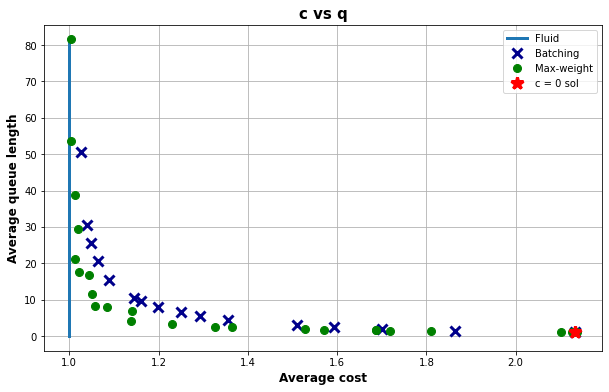

In [6]:
plot_from_sim_paths("../sim_paths_spatial_uniform_16_W_2.0_new.pkl")

In [16]:
np.arange(100,1200,50)

array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000, 1050, 1100, 1150])